In [2]:

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
#import missingno as msno
from scipy import stats

import numpy as np
import datetime
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import precision_score
from sklearn.metrics import precision_score

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score



# Import recall_score
from sklearn.metrics import recall_score

#from sklearn.metrics import roc_auc_curve
# Import roc_curve
from sklearn.metrics import roc_curve



from sklearn.svm import SVC

# Import confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
#import pydotplus



# Import train_test_split
from sklearn.model_selection import train_test_split

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression


from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation



import scipy.stats as st
#import pandas_profiling
import requests 
%matplotlib inline

# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#######################################################
from scipy.stats import spearmanr

from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score 

from xgboost import XGBClassifier
from sklearn import tree
#from sklearn.metrics import accuracy_score
#from sklearn.linear_model import accuracy_score

#from xgboost import XGBClassifier
#import xgboost as xgb


In [3]:
# Semester Start Date:
StartDate = '2018-09-17' 
StartDate = pd.to_datetime(StartDate)


In [4]:
# Semester End Date:
EndDate = '2019-01-21' 
EndDate = pd.to_datetime(EndDate)

In [5]:
TriOne = '2018-10-22'
TriOne = pd.to_datetime(TriOne)

In [6]:
TriTwo = '2018-11-26'
TriTwo = pd.to_datetime(TriTwo)

In [6]:
#BEGIN7
#Will use own grades and moodle logs to merge
# Module 7 has weeks and 14 students grades.14 passed the module with 0 failures.
#Module 7 is a 2nd year group and would be considered more mature and settled.
#The class sizes are very small (<15).Module 7 has two continuous assessments.
#
#

In [7]:
# Begin7 Data Preperation Module 7
# 3 Files in Module 7
# Module 7

module7ml = pd.read_csv('Module7-MoodleLogs.csv')

In [8]:
module7mg = pd.read_csv('Module7-MoodleGrades.csv')

In [9]:
module7og = pd.read_csv('Module7-OwnGrades.csv')

In [10]:
print (module7mg.columns.tolist())


['First name', 'Surname', 'ID number', 'Email address', 'CA2 - Practical Exam (Real)', 'Quiz: CA3 - Theory Test (Real)', 'Last downloaded from this course']


In [11]:
# Print the number of unique values in each modul7mg column
print(module7mg.nunique())

First name                          14
Surname                             14
ID number                           14
Email address                       14
CA2 - Practical Exam (Real)         14
Quiz: CA3 - Theory Test (Real)      14
Last downloaded from this course     1
dtype: int64


In [12]:
print (module7og.columns.tolist())


['ID number', 'First Name', 'Surname', 'Total CA Mark / 100', 'Final Grade', 'CA1 Report / 20', 'CA2 Lab Test / 35', 'CA3 Theory Test / 35', 'Labs CA / 10', 'Wk1-Lab', 'Wk1-Lecture', 'Wk2-CA / 1', 'Wk2-Lab', 'Wk2-Lecture', 'Wk3-CA / 1', 'Wk3-Lab', 'Wk3-Lecture', 'Wk4-CA / 1', 'Wk4-Lab', 'Wk4-Lecture', 'Wk5-CA / 1.5', 'Wk5-Lab', 'Wk5-Lecture', 'Wk6-CA / 1', 'Wk6-Lab', 'Wk6-Lecture', 'Wk7-CA / 1', 'Wk7-Lab', 'Wk7-Lecture', 'Wk8-CA / 1.5', 'Wk8-Lab', 'Wk8-Lecture', 'Wk9-CA2', 'Wk9-Lecture', 'Wk10-CA / 1', 'Wk10-Lab', 'Wk10-Lecture', 'Wk11-CA / 1', 'Wk11-Lab', 'Wk11-Lecture', 'Wk12-CA3', 'Wk12-Lecture', 'Wk15-Lecture']


In [13]:
module7og.dtypes


ID number                object
First Name               object
Surname                  object
Total CA Mark / 100     float64
Final Grade              object
CA1 Report / 20         float64
CA2 Lab Test / 35       float64
CA3 Theory Test / 35    float64
Labs CA / 10            float64
Wk1-Lab                  object
Wk1-Lecture              object
Wk2-CA / 1                int64
Wk2-Lab                  object
Wk2-Lecture              object
Wk3-CA / 1              float64
Wk3-Lab                  object
Wk3-Lecture              object
Wk4-CA / 1                int64
Wk4-Lab                  object
Wk4-Lecture              object
Wk5-CA / 1.5            float64
Wk5-Lab                  object
Wk5-Lecture              object
Wk6-CA / 1              float64
Wk6-Lab                  object
Wk6-Lecture              object
Wk7-CA / 1              float64
Wk7-Lab                  object
Wk7-Lecture              object
Wk8-CA / 1.5            float64
Wk8-Lab                  object
Wk8-Lect

In [14]:

#Engaged = > 55
disengaged7 = module7og['Total CA Mark / 100'] < 55


In [15]:

# Create a new column called df.engaged where the value is yes
# if df.age is greater than 55 and no if not
module7og['disengaged'] = np.where(module7og['Total CA Mark / 100']<=55, '1', '0')


In [16]:
module7og['disengaged'] = pd.to_numeric(module7og['disengaged'])


In [17]:
print(module7og['disengaged'].value_counts(dropna=False))

0    11
1     3
Name: disengaged, dtype: int64


In [18]:
m7og = module7og

In [19]:
#Cleanup7OG

In [20]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk1-Lecture'] = m7og['Wk1-Lecture'].replace({'N': 0 , 'Y': 1})


In [21]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk2-Lecture'] = m7og['Wk2-Lecture'].replace({'N': 0 , 'Y': 1})


In [22]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk3-Lecture'] = m7og['Wk3-Lecture'].replace({'N': 0 , 'Y': 1})


In [23]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk4-Lecture'] = m7og['Wk4-Lecture'].replace({'N': 0 , 'Y': 1})


In [24]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk5-Lecture'] = m7og['Wk5-Lecture'].replace({'N': 0 , 'Y': 1})

In [25]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk6-Lecture'] = m7og['Wk6-Lecture'].replace({'N': 0 , 'Y': 1})

In [26]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk7-Lecture'] = m7og['Wk7-Lecture'].replace({'N': 0 , 'Y': 1})

In [27]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk8-Lecture'] = m7og['Wk8-Lecture'].replace({'N': 0 , 'Y': 1})

In [28]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk9-Lecture'] = m7og['Wk9-Lecture'].replace({'N': 0 , 'Y': 1})

In [29]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk10-Lecture'] = m7og['Wk10-Lecture'].replace({'N': 0 , 'Y': 1})

In [30]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk11-Lecture'] = m7og['Wk11-Lecture'].replace({'N': 0 , 'Y': 1})

In [31]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk12-Lecture'] = m7og['Wk12-Lecture'].replace({'N': 0 , 'Y': 1})

In [32]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk15-Lecture'] = m7og['Wk15-Lecture'].replace({'N': 0 , 'Y': 1})

In [33]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk1-Lab'] = m7og['Wk1-Lab'].replace({'N': 0 , 'Y': 1})

In [34]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk2-Lab'] = m7og['Wk2-Lab'].replace({'N': 0 , 'Y': 1})

In [35]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk3-Lab'] = m7og['Wk3-Lab'].replace({'N': 0 , 'Y': 1})

In [36]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk4-Lab'] = m7og['Wk4-Lab'].replace({'N': 0 , 'Y': 1})

In [37]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk5-Lab'] = m7og['Wk5-Lab'].replace({'N': 0 , 'Y': 1})

In [38]:
# Replace 'no' with 0 and 'yes' with 1 in 'W6-Lecture'  in Module 7

m7og['Wk6-Lab'] = m7og['Wk6-Lab'].replace({'N': 0 , 'Y': 1})

In [39]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk7-Lecture'  in Module 7

m7og['Wk7-Lab'] = m7og['Wk7-Lab'].replace({'N': 0 , 'Y': 1})

In [40]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk8-Lecture'  in Module 7

m7og['Wk8-Lab'] = m7og['Wk8-Lab'].replace({'N': 0 , 'Y': 1})

In [41]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk9-Lecture'  in Module 7

m7og['Wk9-CA2'] = m7og['Wk9-CA2'].replace({'N': 0 , 'Y': 1})

In [42]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk10-Lab'] = m7og['Wk10-Lab'].replace({'N': 0 , 'Y': 1})

In [43]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk11-Lab'] = m7og['Wk11-Lab'].replace({'N': 0 , 'Y': 1})

In [44]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk12-CA3'] = m7og['Wk12-CA3'].replace({'N': 0 , 'Y': 1})

In [45]:
m7og.head(2)

ID number First Name Surname  Total CA Mark / 100 Final Grade  \
0  tzCYvQBD       azCY    bvQB               71.850          B+   
1  FjdRQnjO       ajdR    bQnj               89.885           A   

   CA1 Report / 20  CA2 Lab Test / 35  CA3 Theory Test / 35  Labs CA / 10  \
0              8.8             27.650                 25.40         10.00   
1             16.2             30.975                 33.05          9.66   

   Wk1-Lab  ...  Wk10-CA / 1  Wk10-Lab  Wk10-Lecture  Wk11-CA / 1  Wk11-Lab  \
0        1  ...          1.0         1             1         1.00         1   
1        1  ...          1.0         1             1         0.66         1   

   Wk11-Lecture  Wk12-CA3  Wk12-Lecture  Wk15-Lecture  disengaged  
0             1         1             1             1           0  
1             1         1             1             1           0  

[2 rows x 44 columns]

In [46]:
m7og.head(2)

ID number First Name Surname  Total CA Mark / 100 Final Grade  \
0  tzCYvQBD       azCY    bvQB               71.850          B+   
1  FjdRQnjO       ajdR    bQnj               89.885           A   

   CA1 Report / 20  CA2 Lab Test / 35  CA3 Theory Test / 35  Labs CA / 10  \
0              8.8             27.650                 25.40         10.00   
1             16.2             30.975                 33.05          9.66   

   Wk1-Lab  ...  Wk10-CA / 1  Wk10-Lab  Wk10-Lecture  Wk11-CA / 1  Wk11-Lab  \
0        1  ...          1.0         1             1         1.00         1   
1        1  ...          1.0         1             1         0.66         1   

   Wk11-Lecture  Wk12-CA3  Wk12-Lecture  Wk15-Lecture  disengaged  
0             1         1             1             1           0  
1             1         1             1             1           0  

[2 rows x 44 columns]

In [47]:
X7ss = m7og.iloc[:,5:43]  #independent columns
y7ss = m7og.iloc[:,-1]    #target column i.e engaged


In [48]:
X7ss.head(2)

CA1 Report / 20  CA2 Lab Test / 35  CA3 Theory Test / 35  Labs CA / 10  \
0              8.8             27.650                 25.40         10.00   
1             16.2             30.975                 33.05          9.66   

   Wk1-Lab  Wk1-Lecture  Wk2-CA / 1  Wk2-Lab  Wk2-Lecture  Wk3-CA / 1  ...  \
0        1            1           1        1            1         1.0  ...   
1        1            1           1        1            1         1.0  ...   

   Wk9-Lecture  Wk10-CA / 1  Wk10-Lab  Wk10-Lecture  Wk11-CA / 1  Wk11-Lab  \
0            1          1.0         1             1         1.00         1   
1            1          1.0         1             1         0.66         1   

   Wk11-Lecture  Wk12-CA3  Wk12-Lecture  Wk15-Lecture  
0             1         1             1             1  
1             1         1             1             1  

[2 rows x 38 columns]

In [49]:
y7ss.head(2)

0    0
1    0
Name: disengaged, dtype: int64

In [50]:
#apply SelectKBest class to extract top 8 best features
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X7ss,y7ss)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X7ss.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


                   Specs      Score
1      CA2 Lab Test / 35  24.183153
0        CA1 Report / 20   6.339336
2   CA3 Theory Test / 35   3.262709
24          Wk8-CA / 1.5   0.502090
3           Labs CA / 10   0.403440
5            Wk1-Lecture   0.282051
26           Wk8-Lecture   0.282051
30              Wk10-Lab   0.223140
18            Wk6-CA / 1   0.164053
20           Wk6-Lecture   0.090909


[0.12911288 0.14774786 0.09026087 0.04216434 0.         0.10995623
 0.         0.         0.         0.02562691 0.         0.
 0.         0.         0.         0.01765274 0.00303807 0.00282828
 0.05457226 0.         0.00427273 0.0381964  0.         0.
 0.07372292 0.02450366 0.08200639 0.         0.         0.05346485
 0.03546629 0.00176535 0.02325524 0.0112474  0.01165148 0.
 0.         0.01748684]


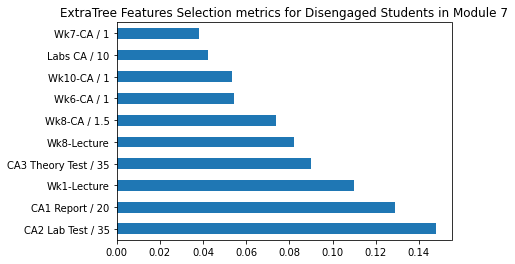

In [51]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X7ss,y7ss)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X7ss.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('ExtraTree Features Selection metrics for Disengaged Students in Module 7')
plt.show()


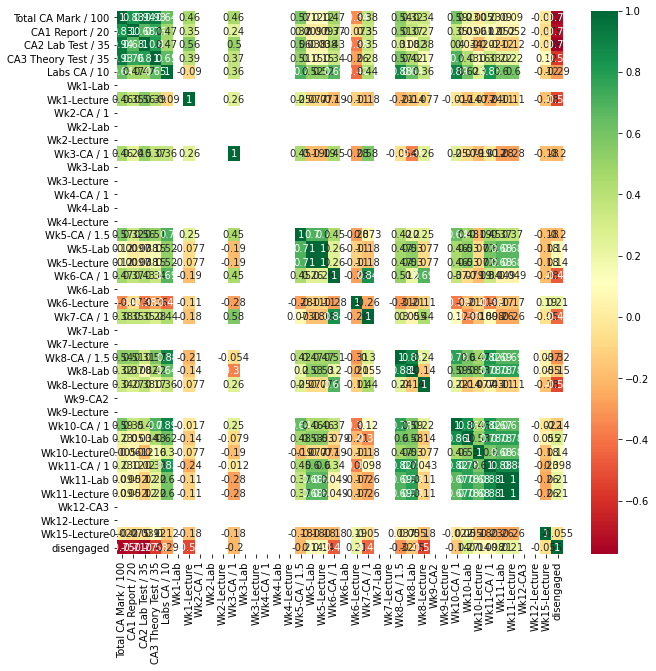

In [52]:
#get correlations of each features in dataset
corrmat = m7og.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(m7og[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [53]:
spear1 = m7og['CA2 Lab Test / 35']

In [54]:
spear2 = m7og['disengaged']

In [55]:
spearcorr = stats.spearmanr(spear1,spear2)
print(spearcorr)
# Would suggest a weak link 

SpearmanrResult(correlation=-0.7125253031944253, pvalue=0.00424047706080388)


In [56]:
spear3 = m7og['CA1 Report / 20']

In [57]:
spearcorr = stats.spearmanr(spear3,spear2)
print(spearcorr)
# Would suggest a weak link 

SpearmanrResult(correlation=-0.6939908707108333, pvalue=0.005898567572400877)


In [58]:
spear4 = m7og['CA3 Theory Test / 35']

In [59]:
spearcorr = stats.spearmanr(spear4,spear2)
print(spearcorr)
# Would suggest a weak link 

SpearmanrResult(correlation=-0.6261585997769192, pvalue=0.01659021417242484)


In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [60]:
m7og_subset = m7og

In [61]:
m7og_subset.head(2)

ID number First Name Surname  Total CA Mark / 100 Final Grade  \
0  tzCYvQBD       azCY    bvQB               71.850          B+   
1  FjdRQnjO       ajdR    bQnj               89.885           A   

   CA1 Report / 20  CA2 Lab Test / 35  CA3 Theory Test / 35  Labs CA / 10  \
0              8.8             27.650                 25.40         10.00   
1             16.2             30.975                 33.05          9.66   

   Wk1-Lab  ...  Wk10-CA / 1  Wk10-Lab  Wk10-Lecture  Wk11-CA / 1  Wk11-Lab  \
0        1  ...          1.0         1             1         1.00         1   
1        1  ...          1.0         1             1         0.66         1   

   Wk11-Lecture  Wk12-CA3  Wk12-Lecture  Wk15-Lecture  disengaged  
0             1         1             1             1           0  
1             1         1             1             1           0  

[2 rows x 44 columns]

In [62]:
#Feature selection7
Xm7og = m7og_subset.iloc[:,5:43]  #independent columns
ym7og = m7og.iloc[:,-1]    #target column i.e engaged


In [63]:
Xm7og.head(2)

CA1 Report / 20  CA2 Lab Test / 35  CA3 Theory Test / 35  Labs CA / 10  \
0              8.8             27.650                 25.40         10.00   
1             16.2             30.975                 33.05          9.66   

   Wk1-Lab  Wk1-Lecture  Wk2-CA / 1  Wk2-Lab  Wk2-Lecture  Wk3-CA / 1  ...  \
0        1            1           1        1            1         1.0  ...   
1        1            1           1        1            1         1.0  ...   

   Wk9-Lecture  Wk10-CA / 1  Wk10-Lab  Wk10-Lecture  Wk11-CA / 1  Wk11-Lab  \
0            1          1.0         1             1         1.00         1   
1            1          1.0         1             1         0.66         1   

   Wk11-Lecture  Wk12-CA3  Wk12-Lecture  Wk15-Lecture  
0             1         1             1             1  
1             1         1             1             1  

[2 rows x 38 columns]

In [64]:
ym7og.head(2)

0    0
1    0
Name: disengaged, dtype: int64

In [65]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(Xm7og,ym7og)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xm7og.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


                   Specs      Score
1      CA2 Lab Test / 35  24.183153
0        CA1 Report / 20   6.339336
2   CA3 Theory Test / 35   3.262709
24          Wk8-CA / 1.5   0.502090
3           Labs CA / 10   0.403440
5            Wk1-Lecture   0.282051
26           Wk8-Lecture   0.282051
30              Wk10-Lab   0.223140
18            Wk6-CA / 1   0.164053
20           Wk6-Lecture   0.090909


[0.16846232 0.11933537 0.08936142 0.01928597 0.         0.10035474
 0.         0.         0.         0.03675589 0.         0.
 0.         0.         0.         0.0263165  0.00254079 0.00254079
 0.0695066  0.         0.00918175 0.03353112 0.         0.
 0.07274411 0.02024101 0.08135177 0.         0.         0.05500081
 0.03573547 0.00510645 0.0191519  0.02252525 0.00229794 0.
 0.         0.00867202]


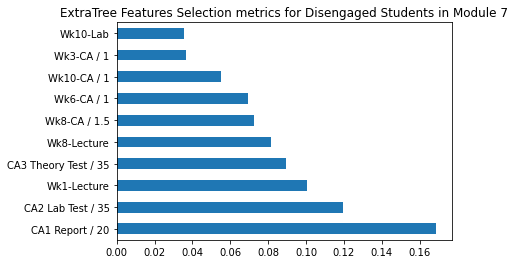

In [66]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(Xm7og,ym7og)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=Xm7og.columns)
plt.title('ExtraTree Features Selection metrics for Disengaged Students in Module 7')
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


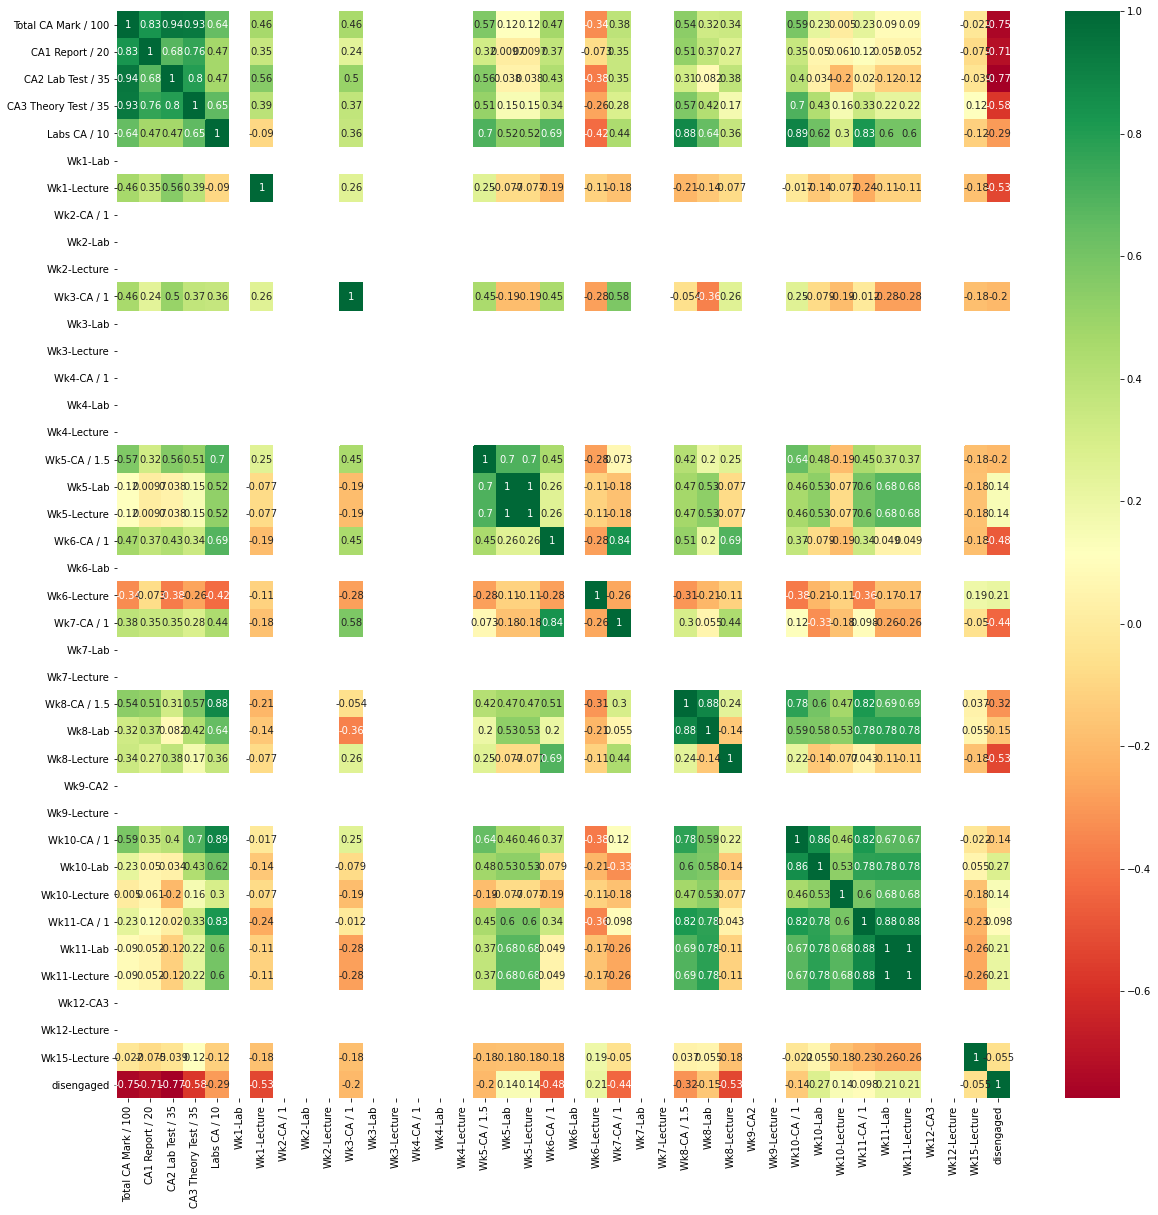

In [67]:
#get correlations of each features in dataset
corrmat = m7og_subset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(m7og_subset[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [68]:
m7og.dtypes


ID number                object
First Name               object
Surname                  object
Total CA Mark / 100     float64
Final Grade              object
CA1 Report / 20         float64
CA2 Lab Test / 35       float64
CA3 Theory Test / 35    float64
Labs CA / 10            float64
Wk1-Lab                   int64
Wk1-Lecture               int64
Wk2-CA / 1                int64
Wk2-Lab                   int64
Wk2-Lecture               int64
Wk3-CA / 1              float64
Wk3-Lab                   int64
Wk3-Lecture               int64
Wk4-CA / 1                int64
Wk4-Lab                   int64
Wk4-Lecture               int64
Wk5-CA / 1.5            float64
Wk5-Lab                   int64
Wk5-Lecture               int64
Wk6-CA / 1              float64
Wk6-Lab                   int64
Wk6-Lecture               int64
Wk7-CA / 1              float64
Wk7-Lab                   int64
Wk7-Lecture               int64
Wk8-CA / 1.5            float64
Wk8-Lab                   int64
Wk8-Lect

In [69]:
# Print the number of unique values in each modul7og column
print(module7og.nunique())

ID number               14
First Name              14
Surname                 14
Total CA Mark / 100     14
Final Grade              6
CA1 Report / 20         10
CA2 Lab Test / 35       14
CA3 Theory Test / 35    14
Labs CA / 10            10
Wk1-Lab                  1
Wk1-Lecture              2
Wk2-CA / 1               1
Wk2-Lab                  1
Wk2-Lecture              1
Wk3-CA / 1               3
Wk3-Lab                  1
Wk3-Lecture              1
Wk4-CA / 1               1
Wk4-Lab                  1
Wk4-Lecture              1
Wk5-CA / 1.5             3
Wk5-Lab                  2
Wk5-Lecture              2
Wk6-CA / 1               3
Wk6-Lab                  1
Wk6-Lecture              2
Wk7-CA / 1               2
Wk7-Lab                  1
Wk7-Lecture              1
Wk8-CA / 1.5             4
Wk8-Lab                  2
Wk8-Lecture              2
Wk9-CA2                  1
Wk9-Lecture              1
Wk10-CA / 1              5
Wk10-Lab                 2
Wk10-Lecture             2
W

In [70]:
# Print the number of unique values in each modul6mg column
print(module7ml.nunique())

Time              1369
User full name      14
Affected user        1
Event context       43
ct                  10
Event name          27
Description         70
Origin               1
IP address           1
dtype: int64


In [57]:
# Cleanup7


In [71]:
#time7
time7 = module7ml["Time"].str.split(",", n = 1, expand = True)

In [72]:
# making separate Date column from new data frame 
module7ml["Date"]= time7[0] 

# making seperate Time column from new data frame
module7ml['Time']= time7[1]


In [73]:
# Convert the date column to datetime64
module7ml.Date = pd.to_datetime(module7ml.Date)

In [74]:
# new data frame with split value columns 
new7 = module7ml["User full name"].str.split(" ", n = 1, expand = True)


In [75]:
# making separate first name column from new data frame 
module7ml["First name"]= new7[0] 

# making separate last name column from new data frame 
module7ml["Last name"]= new7[1] 


In [76]:
module7ml.head(2)

Time User full name Affected user     Event context           ct  \
0   15:46      am5M b1HG             -  Course: Module 7       System   
1   05:48      am5M b1HG             -  Course: Module 7  User report   

                 Event name  \
0             Course viewed   
1  Grade user report viewed   

                                         Description Origin IP address  \
0  The user with id '0' viewed the course with id...    web  127.0.0.1   
1  The user with id '0' viewed the user report in...    web  127.0.0.1   

        Date First name Last name  
0 2019-01-18       am5M      b1HG  
1 2019-01-15       am5M      b1HG

In [77]:
module7ml.drop(module7ml[['IP address','Origin','Description','Affected user']], axis=1)

Time User full name     Event context           ct  \
0      15:46      am5M b1HG  Course: Module 7       System   
1      05:48      am5M b1HG  Course: Module 7  User report   
2      05:48      am5M b1HG  Course: Module 7       System   
3      15:59      ajdR bQnj  Course: Module 7       System   
4      15:59      ajdR bQnj  Course: Module 7  User report   
...      ...            ...               ...          ...   
3162   14:15      aw97 baOy  Course: Module 7       System   
3163   14:15      aw97 baOy  Course: Module 7       System   
3164   14:15      aJGs bxon  Course: Module 7       System   
3165   14:14      aJGs bxon  Course: Module 7       System   
3166   14:14      aJGs bxon  Course: Module 7       System   

                    Event name       Date First name Last name  
0                Course viewed 2019-01-18       am5M      b1HG  
1     Grade user report viewed 2019-01-15       am5M      b1HG  
2                Course viewed 2019-01-15       am5M      b1HG  
3                Course viewed 2019-12-01       ajdR      bQnj  
4     Grade user report viewed 2019-12-01       ajdR      bQnj  
...                        ...        ...        ...       ...  
3162             Role assigned 2018-09-17       aw97      baOy  
3163   User enrolled in course 2018-09-17       aw97      baOy  
3164             Course viewed 2018-09-17       aJGs      bxon  
3165             Role assigned 2018-09-17       aJGs      bxon  
3166   User enrolled in course 2018-09-17       aJGs      bxon  

[3167 rows x 8 columns]

In [78]:
module7ml.head(2)

Time User full name Affected user     Event context           ct  \
0   15:46      am5M b1HG             -  Course: Module 7       System   
1   05:48      am5M b1HG             -  Course: Module 7  User report   

                 Event name  \
0             Course viewed   
1  Grade user report viewed   

                                         Description Origin IP address  \
0  The user with id '0' viewed the course with id...    web  127.0.0.1   
1  The user with id '0' viewed the user report in...    web  127.0.0.1   

        Date First name Last name  
0 2019-01-18       am5M      b1HG  
1 2019-01-15       am5M      b1HG

In [79]:
len(module7ml)

3167

In [80]:
#timeedit7
mask7 = (module7ml['Date'] >= StartDate) & (module7ml['Date'] <= EndDate)

module7ml = module7ml.loc[mask7]

len(module7ml)


2420

In [81]:
#Remove activity outside semester start and end dates range -Timeedit1
week5_7 = (module7ml['Date'] >= StartDate) & (module7ml['Date'] <= TriOne)

FirstFive7 = module7ml.loc[week5_7]
len(FirstFive7)


1605

In [82]:
#Remove activity outside semester start and end dates range -Timeedit1
week10_7 = (module7ml['Date'] >= TriOne) & (module7ml['Date'] <= TriTwo)

FirstTen7 = module7ml.loc[week10_7]

len(FirstTen7)


1019

In [83]:
#Remove activity outside semester start and end dates range -Timeedit1
week15_7 = (module7ml['Date'] >= TriTwo) & (module7ml['Date'] <= EndDate)

FirstFivt7 = module7ml.loc[week15_7]

len(FirstFivt7)


214

In [84]:
# Onehot7
module7ml_onehot = module7ml.copy()
module7ml_onehot = pd.get_dummies(module7ml_onehot, columns=['Event name'], prefix = ['Event name'])
module7ml_onehot = pd.get_dummies(module7ml_onehot, columns=['Event context'], prefix = ['Event context'])
module7ml_onehot = pd.get_dummies(module7ml_onehot, columns=['ct'], prefix = ['ct'])


print(module7ml_onehot.head())


      Time User full name Affected user  \
0    15:46      am5M b1HG             -   
1    05:48      am5M b1HG             -   
2    05:48      am5M b1HG             -   
45   21:03      ajdR bQnj             -   
46   16:11      am5M b1HG             -   

                                          Description Origin IP address  \
0   The user with id '0' viewed the course with id...    web  127.0.0.1   
1   The user with id '0' viewed the user report in...    web  127.0.0.1   
2   The user with id '0' viewed the course with id...    web  127.0.0.1   
45  The user with id '0' viewed the course with id...    web  127.0.0.1   
46  The user with id '0' viewed the course with id...    web  127.0.0.1   

         Date First name Last name  Event name_A file has been uploaded.  ...  \
0  2019-01-18       am5M      b1HG                                     0  ...   
1  2019-01-15       am5M      b1HG                                     0  ...   
2  2019-01-15       am5M      b1HG             

In [85]:
module7ml_onehot.head(2)

Time User full name Affected user  \
0   15:46      am5M b1HG             -   
1   05:48      am5M b1HG             -   

                                         Description Origin IP address  \
0  The user with id '0' viewed the course with id...    web  127.0.0.1   
1  The user with id '0' viewed the user report in...    web  127.0.0.1   

        Date First name Last name  Event name_A file has been uploaded.  ...  \
0 2019-01-18       am5M      b1HG                                     0  ...   
1 2019-01-15       am5M      b1HG                                     0  ...   

   ct_Assignment  ct_File  ct_File submissions  ct_Forum  ct_Overview report  \
0              0        0                    0         0                   0   
1              0        0                    0         0                   0   

   ct_Quiz  ct_System  ct_Turnitin Assignment 2  ct_URL  ct_User report  
0        0          1                         0       0               0  
1        0          0                         0       0               1  

[2 rows x 87 columns]

In [86]:
module7ml_onehot.drop(module7ml_onehot[['IP address','Origin','Description','Affected user']], axis=1)

Time User full name       Date First name Last name  \
0      15:46      am5M b1HG 2019-01-18       am5M      b1HG   
1      05:48      am5M b1HG 2019-01-15       am5M      b1HG   
2      05:48      am5M b1HG 2019-01-15       am5M      b1HG   
45     21:03      ajdR bQnj 2018-12-30       ajdR      bQnj   
46     16:11      am5M b1HG 2018-12-28       am5M      b1HG   
...      ...            ...        ...        ...       ...   
3162   14:15      aw97 baOy 2018-09-17       aw97      baOy   
3163   14:15      aw97 baOy 2018-09-17       aw97      baOy   
3164   14:15      aJGs bxon 2018-09-17       aJGs      bxon   
3165   14:14      aJGs bxon 2018-09-17       aJGs      bxon   
3166   14:14      aJGs bxon 2018-09-17       aJGs      bxon   

      Event name_A file has been uploaded.  \
0                                        0   
1                                        0   
2                                        0   
45                                       0   
46                                       0   
...                                    ...   
3162                                     0   
3163                                     0   
3164                                     0   
3165                                     0   
3166                                     0   

      Event name_A submission has been submitted.  Event name_Add Submission  \
0                                               0                          0   
1                                               0                          0   
2                                               0                          0   
45                                              0                          0   
46                                              0                          0   
...                                           ...                        ...   
3162                                            0                          0   
3163                                            0                          0   
3164                                            0                          0   
3165                                            0                          0   
3166                                            0                          0   

      Event name_Badge listing viewed  \
0                                   0   
1                                   0   
2                                   0   
45                                  0   
46                                  0   
...                               ...   
3162                                0   
3163                                0   
3164                                0   
3165                                0   
3166                                0   

      Event name_Course module instance list viewed  ...  ct_Assignment  \
0                                                 0  ...              0   
1                                                 0  ...              0   
2                                                 0  ...              0   
45                                                0  ...              0   
46                                                0  ...              0   
...                                             ...  ...            ...   
3162                                              0  ...              0   
3163                                              0  ...              0   
3164                                              0  ...              0   
3165                                              0  ...              0   
3166                                              0  ...              0   

      ct_File  ct_File submissions  ct_Forum  ct_Overview report  ct_Quiz  \
0           0                    0         0                   0        0   
1           0                    0         0                   0        0   
2           0                    0         0                   0        0   
45          0                    0 

In [87]:
module7ml_onehot = module7ml_onehot.drop(module7ml_onehot[['IP address','Origin','Description','Affected user']], axis=1)

In [88]:
module7ml_onehot.head(2)

Time User full name       Date First name Last name  \
0   15:46      am5M b1HG 2019-01-18       am5M      b1HG   
1   05:48      am5M b1HG 2019-01-15       am5M      b1HG   

   Event name_A file has been uploaded.  \
0                                     0   
1                                     0   

   Event name_A submission has been submitted.  Event name_Add Submission  \
0                                            0                          0   
1                                            0                          0   

   Event name_Badge listing viewed  \
0                                0   
1                                0   

   Event name_Course module instance list viewed  ...  ct_Assignment  ct_File  \
0                                              0  ...              0        0   
1                                              0  ...              0        0   

   ct_File submissions  ct_Forum  ct_Overview report  ct_Quiz  ct_System  \
0                    0         0                   0        0          1   
1                    0         0                   0        0          0   

   ct_Turnitin Assignment 2  ct_URL  ct_User report  
0                         0       0               0  
1                         0       0               1  

[2 rows x 83 columns]

In [89]:
m7ml_subset = module7ml.drop(module7ml[['IP address','Origin','Description','Affected user']], axis=1)

In [90]:
m7ml_subset.head(2)

Time User full name     Event context           ct  \
0   15:46      am5M b1HG  Course: Module 7       System   
1   05:48      am5M b1HG  Course: Module 7  User report   

                 Event name       Date First name Last name  
0             Course viewed 2019-01-18       am5M      b1HG  
1  Grade user report viewed 2019-01-15       am5M      b1HG

In [91]:
m7og_subset.head(2)

ID number First Name Surname  Total CA Mark / 100 Final Grade  \
0  tzCYvQBD       azCY    bvQB               71.850          B+   
1  FjdRQnjO       ajdR    bQnj               89.885           A   

   CA1 Report / 20  CA2 Lab Test / 35  CA3 Theory Test / 35  Labs CA / 10  \
0              8.8             27.650                 25.40         10.00   
1             16.2             30.975                 33.05          9.66   

   Wk1-Lab  ...  Wk10-CA / 1  Wk10-Lab  Wk10-Lecture  Wk11-CA / 1  Wk11-Lab  \
0        1  ...          1.0         1             1         1.00         1   
1        1  ...          1.0         1             1         0.66         1   

   Wk11-Lecture  Wk12-CA3  Wk12-Lecture  Wk15-Lecture  disengaged  
0             1         1             1             1           0  
1             1         1             1             1           0  

[2 rows x 44 columns]

In [92]:

# Rename the columns of df2_melted: df2_tidy
m7og_subset_tidy = m7og_subset.rename(columns = {'First Name': 'First name',}, inplace = False)


In [93]:
m7og_subset_tidy.head(2)

ID number First name Surname  Total CA Mark / 100 Final Grade  \
0  tzCYvQBD       azCY    bvQB               71.850          B+   
1  FjdRQnjO       ajdR    bQnj               89.885           A   

   CA1 Report / 20  CA2 Lab Test / 35  CA3 Theory Test / 35  Labs CA / 10  \
0              8.8             27.650                 25.40         10.00   
1             16.2             30.975                 33.05          9.66   

   Wk1-Lab  ...  Wk10-CA / 1  Wk10-Lab  Wk10-Lecture  Wk11-CA / 1  Wk11-Lab  \
0        1  ...          1.0         1             1         1.00         1   
1        1  ...          1.0         1             1         0.66         1   

   Wk11-Lecture  Wk12-CA3  Wk12-Lecture  Wk15-Lecture  disengaged  
0             1         1             1             1           0  
1             1         1             1             1           0  

[2 rows x 44 columns]

In [94]:
len(m7og_subset_tidy)

14

In [95]:
module7ml_onehot.head(2)

Time User full name       Date First name Last name  \
0   15:46      am5M b1HG 2019-01-18       am5M      b1HG   
1   05:48      am5M b1HG 2019-01-15       am5M      b1HG   

   Event name_A file has been uploaded.  \
0                                     0   
1                                     0   

   Event name_A submission has been submitted.  Event name_Add Submission  \
0                                            0                          0   
1                                            0                          0   

   Event name_Badge listing viewed  \
0                                0   
1                                0   

   Event name_Course module instance list viewed  ...  ct_Assignment  ct_File  \
0                                              0  ...              0        0   
1                                              0  ...              0        0   

   ct_File submissions  ct_Forum  ct_Overview report  ct_Quiz  ct_System  \
0                    0         0                   0        0          1   
1                    0         0                   0        0          0   

   ct_Turnitin Assignment 2  ct_URL  ct_User report  
0                         0       0               0  
1                         0       0               1  

[2 rows x 83 columns]

In [96]:
#Mergesub7
merge_subset7 = pd.merge(module7ml_onehot,m7og_subset_tidy[['First name','disengaged']],on='First name', how='left')

In [97]:
merge_subset7.head(2)

Time User full name       Date First name Last name  \
0   15:46      am5M b1HG 2019-01-18       am5M      b1HG   
1   05:48      am5M b1HG 2019-01-15       am5M      b1HG   

   Event name_A file has been uploaded.  \
0                                     0   
1                                     0   

   Event name_A submission has been submitted.  Event name_Add Submission  \
0                                            0                          0   
1                                            0                          0   

   Event name_Badge listing viewed  \
0                                0   
1                                0   

   Event name_Course module instance list viewed  ...  ct_File  \
0                                              0  ...        0   
1                                              0  ...        0   

   ct_File submissions  ct_Forum  ct_Overview report  ct_Quiz  ct_System  \
0                    0         0                   0        0          1   
1                    0         0                   0        0          0   

   ct_Turnitin Assignment 2  ct_URL  ct_User report  disengaged  
0                         0       0               0           0  
1                         0       0               1           0  

[2 rows x 84 columns]

In [98]:
merge_subset7.dtypes

Time                                object
User full name                      object
Date                        datetime64[ns]
First name                          object
Last name                           object
                                 ...      
ct_System                            uint8
ct_Turnitin Assignment 2             uint8
ct_URL                               uint8
ct_User report                       uint8
disengaged                           int64
Length: 84, dtype: object

In [99]:
merge_subset7.head(2)

Time User full name       Date First name Last name  \
0   15:46      am5M b1HG 2019-01-18       am5M      b1HG   
1   05:48      am5M b1HG 2019-01-15       am5M      b1HG   

   Event name_A file has been uploaded.  \
0                                     0   
1                                     0   

   Event name_A submission has been submitted.  Event name_Add Submission  \
0                                            0                          0   
1                                            0                          0   

   Event name_Badge listing viewed  \
0                                0   
1                                0   

   Event name_Course module instance list viewed  ...  ct_File  \
0                                              0  ...        0   
1                                              0  ...        0   

   ct_File submissions  ct_Forum  ct_Overview report  ct_Quiz  ct_System  \
0                    0         0                   0        0          1   
1                    0         0                   0        0          0   

   ct_Turnitin Assignment 2  ct_URL  ct_User report  disengaged  
0                         0       0               0           0  
1                         0       0               1           0  

[2 rows x 84 columns]

In [100]:
len(merge_subset7)

2420

In [101]:
merge_subset7.head(6)

Time User full name       Date First name Last name  \
0   15:46      am5M b1HG 2019-01-18       am5M      b1HG   
1   05:48      am5M b1HG 2019-01-15       am5M      b1HG   
2   05:48      am5M b1HG 2019-01-15       am5M      b1HG   
3   21:03      ajdR bQnj 2018-12-30       ajdR      bQnj   
4   16:11      am5M b1HG 2018-12-28       am5M      b1HG   
5   14:09      atVF bWWA 2018-12-21       atVF      bWWA   

   Event name_A file has been uploaded.  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   
5                                     0   

   Event name_A submission has been submitted.  Event name_Add Submission  \
0                                            0                          0   
1                                            0                          0   
2                                            0                          0   
3                                            0                          0   
4                                            0                          0   
5                                            0                          0   

   Event name_Badge listing viewed  \
0                                0   
1                                0   
2                                0   
3                                0   
4                                0   
5                                0   

   Event name_Course module instance list viewed  ...  ct_File  \
0                                              0  ...        0   
1                                              0  ...        0   
2                                              0  ...        0   
3                                              0  ...        0   
4                                              0  ...        0   
5                                              0  ...        0   

   ct_File submissions  ct_Forum  ct_Overview report  ct_Quiz  ct_System  \
0                    0         0                   0        0          1   
1                    0         0                   0        0          0   
2                    0         0                   0        0          1   
3                    0         0                   0        0          1   
4                    0         0                   0        0          1   
5                    0         0                   0        0          1   

   ct_Turnitin Assignment 2  ct_URL  ct_User report  disengaged  
0                         0       0               0           0  
1                         0       0               1           0  
2                         0       0               0           0  
3                         0       0               0           0  
4                         0       0               0           0  
5                         0       0               0           0  

[6 rows x 84 columns]

In [102]:
#Feature selection
X7s = merge_subset7.iloc[:,5:83]  #independent columns
y7s = merge_subset7.iloc[:,-1]    #target column i.e engaged


In [103]:
X7s.head(2)

Event name_A file has been uploaded.  \
0                                     0   
1                                     0   

   Event name_A submission has been submitted.  Event name_Add Submission  \
0                                            0                          0   
1                                            0                          0   

   Event name_Badge listing viewed  \
0                                0   
1                                0   

   Event name_Course module instance list viewed  \
0                                              0   
1                                              0   

   Event name_Course module viewed  Event name_Course user report viewed  \
0                                0                                     0   
1                                0                                     0   

   Event name_Course viewed  Event name_Discussion viewed  \
0                         1                             0   
1                         0                             0   

   Event name_Grade overview report viewed  ...  ct_Assignment  ct_File  \
0                                        0  ...              0        0   
1                                        0  ...              0        0   

   ct_File submissions  ct_Forum  ct_Overview report  ct_Quiz  ct_System  \
0                    0         0                   0        0          1   
1                    0         0                   0        0          0   

   ct_Turnitin Assignment 2  ct_URL  ct_User report  
0                         0       0               0  
1                         0       0               1  

[2 rows x 78 columns]

In [104]:
y7s.head(2)

0    0
1    0
Name: disengaged, dtype: int64

In [105]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X7s,y7s)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X7s.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


                                                Specs      Score
11                        Event name_List Submissions  15.886981
66  Event context_Turnitin Assignment 2: CA1 -SPCD...  14.262450
75                           ct_Turnitin Assignment 2  14.262450
46             Event context_File: Lab 6 -oS And D Qs  11.491018
29                     Event context_Course: Module 7   8.297773
10                Event name_Grade user report viewed   6.500927
77                                     ct_User report   6.500927
12                   Event name_Quiz attempt reviewed   6.140754
63                  Event context_File: Lecture 9 - p   5.662156
74                                          ct_System   5.070081


[0.00074265 0.00071057 0.0071023  0.00477895 0.00902958 0.02940679
 0.00410901 0.00934886 0.00375614 0.00262145 0.01977921 0.06617732
 0.03308566 0.00131609 0.00096903 0.00135928 0.01688981 0.00055035
 0.00122835 0.00421614 0.00609728 0.00197856 0.00062287 0.00076753
 0.00131809 0.00238349 0.00039397 0.00257517 0.00809682 0.02873405
 0.00200854 0.0199257  0.01036501 0.00686958 0.00094272 0.002535
 0.00055093 0.0010249  0.00883429 0.00204468 0.00171644 0.0027221
 0.02734657 0.02637883 0.0022619  0.00243393 0.10286783 0.00266038
 0.01139962 0.03161885 0.03458864 0.01656561 0.0383028  0.03483715
 0.00051917 0.01329602 0.01648989 0.03571874 0.00039783 0.00157191
 0.01944703 0.0097097  0.00948077 0.05189457 0.00490686 0.01735317
 0.0323515  0.00143008 0.00410793 0.00837466 0.00109683 0.0053376
 0.0023563  0.0220537  0.01858586 0.04089855 0.00164472 0.02002924]


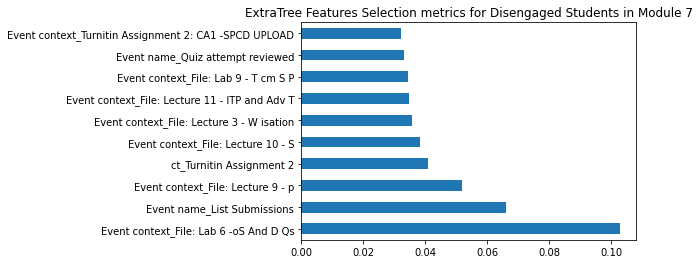

In [106]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X7s,y7s)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X7s.columns)
plt.title('ExtraTree Features Selection metrics for Disengaged Students in Module 7')
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


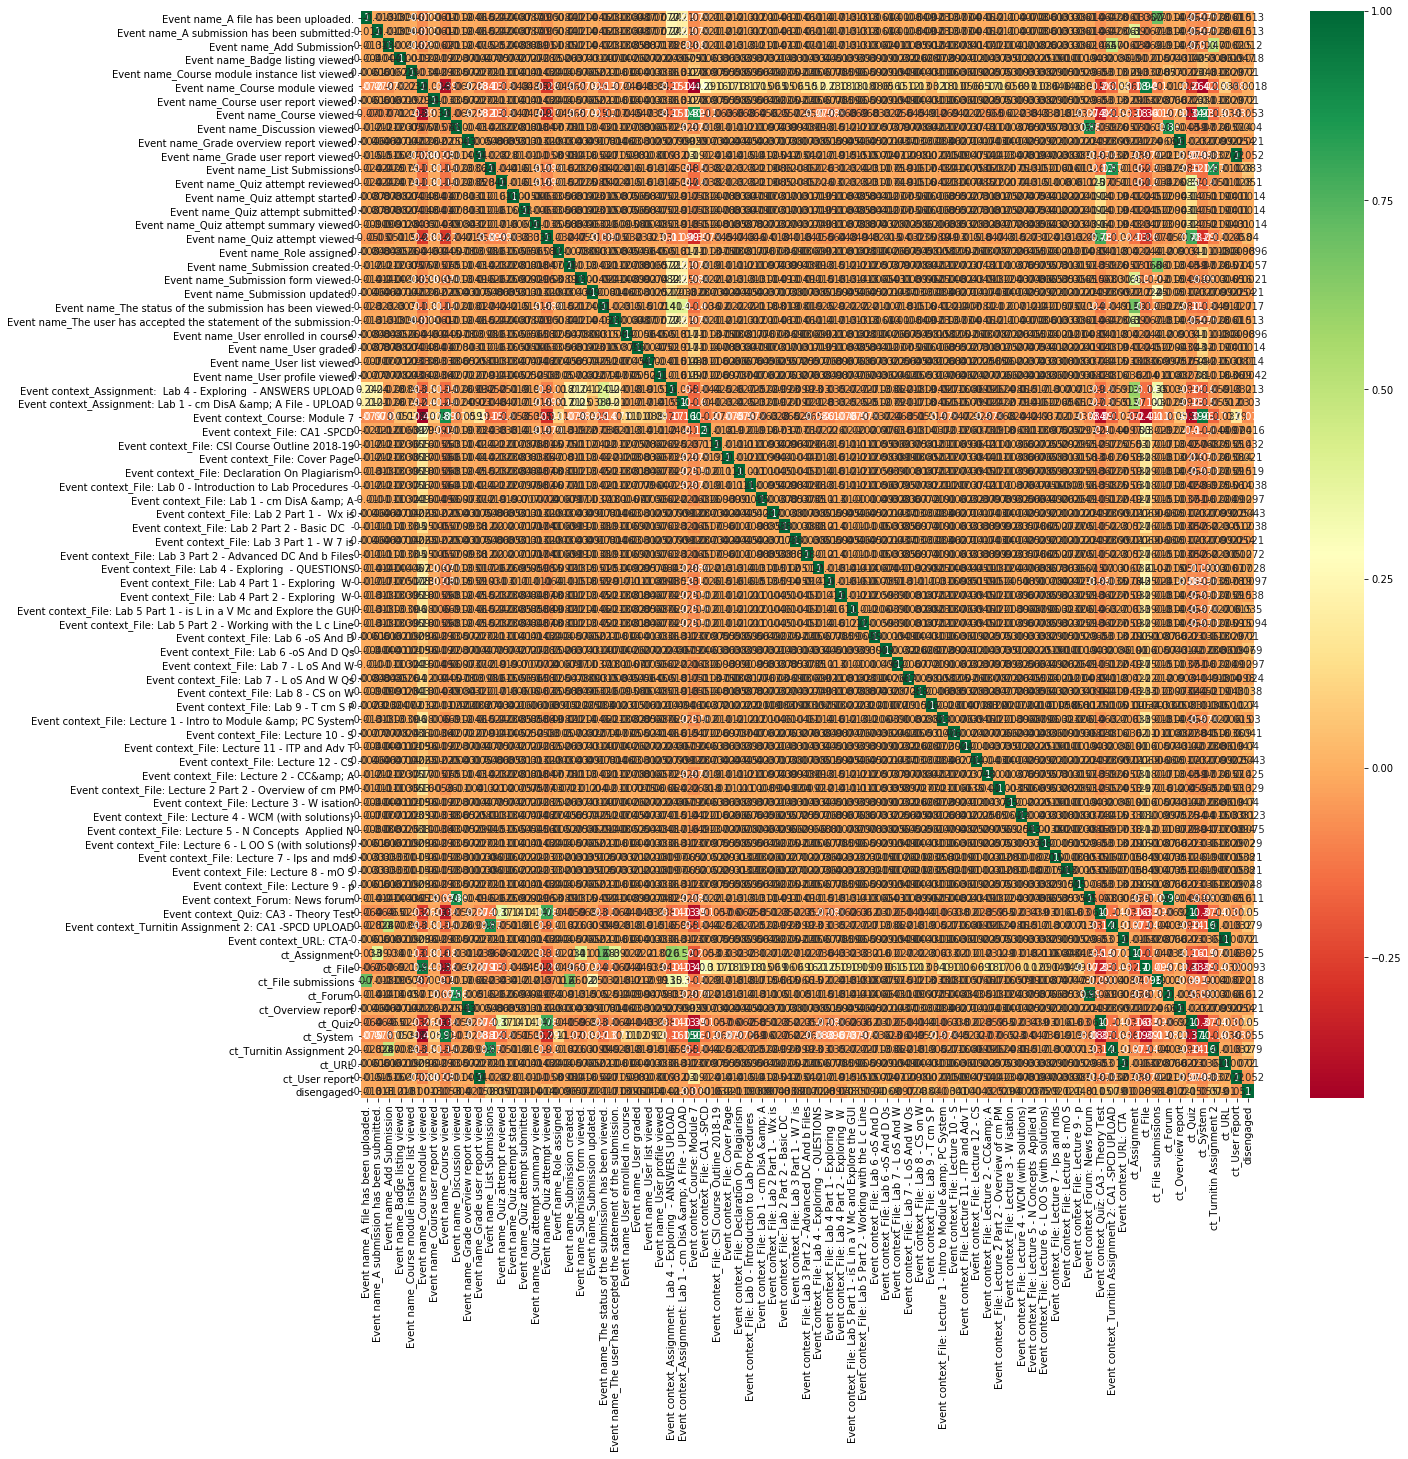

In [204]:
#get correlations of each features in dataset
corrmat = merge_subset7.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(merge_subset7[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [205]:
X7s.columns

Index(['Event name_A file has been uploaded.',
       'Event name_A submission has been submitted.',
       'Event name_Add Submission', 'Event name_Badge listing viewed',
       'Event name_Course module instance list viewed',
       'Event name_Course module viewed',
       'Event name_Course user report viewed', 'Event name_Course viewed',
       'Event name_Discussion viewed',
       'Event name_Grade overview report viewed',
       'Event name_Grade user report viewed', 'Event name_List Submissions',
       'Event name_Quiz attempt reviewed', 'Event name_Quiz attempt started',
       'Event name_Quiz attempt submitted',
       'Event name_Quiz attempt summary viewed',
       'Event name_Quiz attempt viewed', 'Event name_Role assigned',
       'Event name_Submission created.', 'Event name_Submission form viewed.',
       'Event name_Submission updated.',
       'Event name_The status of the submission has been viewed.',
       'Event name_The user has accepted the statement of the 

In [ ]:
#11                        Event name_List Submissions  15.886981
#66  Event context_Turnitin Assignment 2: CA1 -SPCD...  14.262450
#75                           ct_Turnitin Assignment 2  14.262450
#46             Event context_File: Lab 6 -oS And D Qs  11.491018
#29                     Event context_Course: Module 7   8.297773
#10                Event name_Grade user report viewed   6.500927
#77                                     ct_User report   6.500927
#12                   Event name_Quiz attempt reviewed   6.140754
#63                  Event context_File: Lecture 9 - p   5.662156
#74                                          ct_System   5.070081

In [107]:
featselect7 = X7s[['Event name_List Submissions','Event context_Turnitin Assignment 2: CA1 -SPCD UPLOAD','ct_Turnitin Assignment 2','Event context_File: Lab 6 -oS And D Qs','Event context_Course: Module 7','Event name_Grade user report viewed','ct_User report','Event name_Quiz attempt reviewed','Event context_File: Lecture 9 - p','ct_System']]

In [108]:
featselect7.head(2)

Event name_List Submissions  \
0                            0   
1                            0   

   Event context_Turnitin Assignment 2: CA1 -SPCD UPLOAD  \
0                                                  0       
1                                                  0       

   ct_Turnitin Assignment 2  Event context_File: Lab 6 -oS And D Qs  \
0                         0                                       0   
1                         0                                       0   

   Event context_Course: Module 7  Event name_Grade user report viewed  \
0                               1                                    0   
1                               1                                    1   

   ct_User report  Event name_Quiz attempt reviewed  \
0               0                                 0   
1               1                                 0   

   Event context_File: Lecture 9 - p  ct_System  
0                                  0          1  
1                                  0          0

In [109]:
Xfs7 = featselect7 # Features
yfs7 = y7s # Target variable


In [110]:

# Split dataset into training set and test set
Xfs7_train, Xfs7_test, yfs7_train, yfs7_test = train_test_split(Xfs7, yfs7, test_size=0.3, random_state=1) # 70% training and 30% test


In [183]:
# Create Decision Tree classifer object
dtclffs7 = DecisionTreeClassifier(max_depth =3,criterion ='gini',max_features =10)

# Train Decision Tree Classifer
dtclffs7 = dtclffs7.fit(Xfs7_train,yfs7_train)

#Predict the response for test dataset
yfs7_pred = dtclffs7.predict(Xfs7_test)


In [184]:
# Compute accuracy
print(dtclffs7.score(Xfs7_test, yfs7_test))

0.7796143250688705


In [119]:
# Compute accuracy
print(dtclffs7.score(Xfs7_test, yfs7_test))

0.7796143250688705


In [185]:
cvscores_10dt = cross_val_score(dtclffs7, Xfs7_train, yfs7_train, cv = 10)
print(np.mean(cvscores_10dt))

0.7998781761225201


In [186]:
# Instantiate the classifier
rfclffs7 = RandomForestClassifier(n_estimators =1,bootstrap ='true',criterion = 'gini',max_depth = 3,max_features =3)

# Fit to the training data
rfclffs7.fit(Xfs7_train, yfs7_train)

# Compute accuracy
print(rfclffs7.score(Xfs7_test, yfs7_test))


0.778236914600551


In [187]:
cvscores_10rf = cross_val_score(rfclffs7, Xfs7_train, yfs7_train, cv = 10)
print(np.mean(cvscores_10rf))

0.7987017055342849


In [188]:
from sklearn.svm import SVC

svcfs7 = SVC(kernel ='linear',C=1.0)

#Train it, or "fit it", to the data:
svcfs7.fit(Xfs7_train, yfs7_train)

# Compute accuracy
print(svcfs7.score(Xfs7_test, yfs7_test))


0.7796143250688705


In [124]:
cvscores_10svc = cross_val_score(svcfs7, Xfs7_train, yfs7_train, cv = 10)
print(np.mean(cvscores_10svc))

0.7981134702401672


In [125]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logregfs7 = LogisticRegression()

# fit the model with data
logregfs7.fit(Xfs7_train,yfs7_train)

#
ylg7_pred=logregfs7.predict(Xfs7_test)


In [126]:
print(logregfs7.score(Xfs7_test, yfs7_test))

0.778236914600551


In [127]:
cvscores_10 = cross_val_score(logregfs7, Xfs7_train, yfs7_train, cv = 10)
print(np.mean(cvscores_10))

0.7981134702401672


In [125]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yfs7_test, yfs7_pred))


Accuracy: 0.779614325069


In [126]:
# Import precision_score
from sklearn.metrics import precision_score

# Print the precision
print(precision_score(yfs7_test, yfs7_pred))


0.333333333333


In [127]:
# Import recall_score - Perfect recall score
from sklearn.metrics import recall_score

# Print the recall
print(recall_score(yfs7_test, yfs7_pred))


0.0062893081761


In [128]:
print("Accuracy:",metrics.accuracy_score(yfs7_test, yfs7_pred))
print("Precision:",metrics.precision_score(yfs7_test, yfs7_pred))
print("Recall:",metrics.recall_score(yfs7_test, yfs7_pred))
print("F1 Score",metrics.f1_score(yfs7_test, yfs7_pred))


Accuracy: 0.779614325069
Precision: 0.333333333333
Recall: 0.0062893081761
F1 Score 0.0123456790123


In [129]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(yfs7_test, yfs7_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(yfs7_test, yfs7_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yfs7_test, yfs7_pred)))

Mean Absolute Error: 0.220385674931
Mean Squared Error: 0.220385674931
Root Mean Squared Error: 0.469452526813


In [128]:
len(m7ml_subset)

2420

In [131]:
#timeedit7
mask7 = (m7ml_subset['Date'] >= StartDate) & (m7ml_subset['Date'] <= EndDate)

m7ml_subset = m7ml_subset.loc[mask7]

len(m7ml_subset)


2420

In [129]:
# Generate the confusion matrix and classification report
print(confusion_matrix(yfs7_test, ylg7_pred))
print(classification_report(yfs7_test, ylg7_pred))


[[565   2]
 [159   0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       567
           1       0.00      0.00      0.00       159

    accuracy                           0.78       726
   macro avg       0.39      0.50      0.44       726
weighted avg       0.61      0.78      0.68       726



In [130]:
# import the metrics class
from sklearn import metrics
cnflr7_matrix = metrics.confusion_matrix(yfs7_test, ylg7_pred)
cnflr7_matrix


array([[565,   2],
       [159,   0]], dtype=int64)

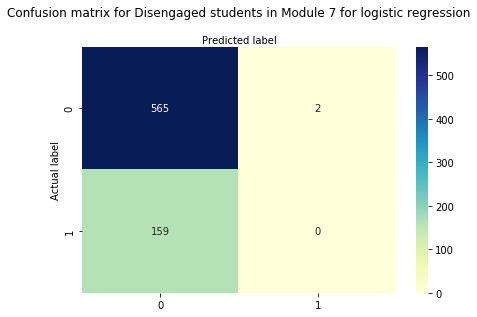

In [181]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnflr7_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Disengaged students in Module 7 for logistic regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


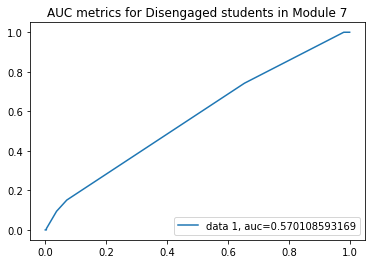

In [182]:
ylg7_pred_proba = logregfs7.predict_proba(Xfs7_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yfs7_test,  ylg7_pred_proba)
auc = metrics.roc_auc_score(yfs7_test, ylg7_pred_proba)
plt.title('AUC metrics for Disengaged students in Module 7')

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# AUC score for the case is 0.57. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.
#


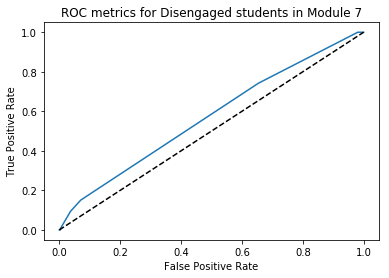

In [184]:
# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(yfs7_test, ylg7_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.title('ROC metrics for Disengaged students in Module 7')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()


In [ ]:
#``

In [189]:
# Instantiate bootstrap aggregation model
bagged_model = BaggingClassifier(n_estimators=50, random_state=123)

# Fit
bagged_model.fit(Xfs7_train, yfs7_train)

# Predict
bagged_pred = bagged_model.predict(Xfs7_test)

#print(logregfs1.score(Xfs_train, yfs_train))

# Print accuracy score
print(accuracy_score(yfs7_test, bagged_pred))


0.7796143250688705


In [190]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(bagged_model, Xfs7_train, yfs7_train, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(bagged_model, Xfs7_train, yfs7_train, cv = 10)
print(np.mean(cvscores_10))

0.7992918261888325
0.8010581273929691


In [132]:
# Boosting model
boosted_model = AdaBoostClassifier(n_estimators=50, random_state=123)

# Fit
boosted_model_fit = boosted_model.fit(Xfs7_train, yfs7_train)

# Predict
boosted_pred = boosted_model_fit.predict(Xfs7_test)

# Print model accuracy
print(accuracy_score(yfs7_test, boosted_pred))


0.7796143250688705


In [191]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(boosted_model, Xfs7_train, yfs7_train, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(boosted_model, Xfs7_train, yfs7_train, cv = 10)
print(np.mean(cvscores_10))

0.7992918261888325
0.8010581273929691


In [133]:
import xgboost as xgb

In [192]:
# Instantiate
xgb = XGBClassifier(random_state=123, learning_rate=0.1, n_estimators=10, max_depth=3)

# Fit
xgb = xgb.fit(Xfs7_train, yfs7_train)

# Predict
xgb_pred = xgb.predict(Xfs7_test)

# Print accuracy score
print('Final prediction score: [%.8f]' % accuracy_score(yfs7_test, xgb_pred))


Final prediction score: [0.77823691]


In [193]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(xgb, Xfs7_train, yfs7_train, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(xgb, Xfs7_train, yfs7_train, cv = 10)
print(np.mean(cvscores_10))

0.7981108391388941
0.7981134702401672


In [180]:
# Generate the confusion matrix and classification report
print(confusion_matrix(yfs7_test, xgb_pred))
print(classification_report(yfs7_test, xgb_pred))


[[565   2]
 [159   0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       567
           1       0.00      0.00      0.00       159

    accuracy                           0.78       726
   macro avg       0.39      0.50      0.44       726
weighted avg       0.61      0.78      0.68       726



In [ ]:
#``

In [132]:

#Trimester1

In [135]:
FirstFive7.head(2)

Time User full name Affected user          Event context      ct  \
112   21:25      ajrV bTes             -  File: Lab 8 - CS on W    File   
113   21:25      ajrV bTes             -       Course: Module 7  System   

               Event name                                        Description  \
112  Course module viewed  The user with id '0' viewed the 'resource' act...   
113         Course viewed  The user with id '0' viewed the course with id...   

    Origin IP address       Date First name Last name  
112    web  127.0.0.1 2018-10-12       ajrV      bTes  
113    web  127.0.0.1 2018-10-12       ajrV      bTes

In [136]:
FirstFive7= FirstFive7.drop(FirstFive7[['IP address','Origin','Description','Affected user']], axis=1)


In [137]:
FirstFive7.head(2)

Time User full name          Event context      ct  \
112   21:25      ajrV bTes  File: Lab 8 - CS on W    File   
113   21:25      ajrV bTes       Course: Module 7  System   

               Event name       Date First name Last name  
112  Course module viewed 2018-10-12       ajrV      bTes  
113         Course viewed 2018-10-12       ajrV      bTes

In [138]:
FirstFive7_onehot = FirstFive7.copy()
FirstFive7_onehot = pd.get_dummies(FirstFive7_onehot, columns=['Event name'], prefix = ['Event name'])
FirstFive7_onehot = pd.get_dummies(FirstFive7_onehot, columns=['Event context'], prefix = ['Event context'])
FirstFive7_onehot = pd.get_dummies(FirstFive7_onehot, columns=['ct'], prefix = ['ct'])


print(FirstFive7_onehot.head())

###
#
# One-Hot encoding
# The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column.
# This has the benefit of not weighting a value improperly.
# https://www.datacamp.com/community/tutorials/categorical-data



       Time User full name       Date First name Last name  \
112   21:25      ajrV bTes 2018-10-12       ajrV      bTes   
113   21:25      ajrV bTes 2018-10-12       ajrV      bTes   
114   21:24      ajrV bTes 2018-10-12       ajrV      bTes   
115   21:24      ajrV bTes 2018-10-12       ajrV      bTes   
116   21:24      ajrV bTes 2018-10-12       ajrV      bTes   

     Event name_A file has been uploaded.  \
112                                     0   
113                                     0   
114                                     0   
115                                     0   
116                                     0   

     Event name_A submission has been submitted.  \
112                                            0   
113                                            0   
114                                            0   
115                                            0   
116                                            0   

     Event name_Badge listing viewed  \
112

In [139]:
FirstFive7_onehot.head(2)

Time User full name       Date First name Last name  \
112   21:25      ajrV bTes 2018-10-12       ajrV      bTes   
113   21:25      ajrV bTes 2018-10-12       ajrV      bTes   

     Event name_A file has been uploaded.  \
112                                     0   
113                                     0   

     Event name_A submission has been submitted.  \
112                                            0   
113                                            0   

     Event name_Badge listing viewed  \
112                                0   
113                                0   

     Event name_Course module instance list viewed  \
112                                              0   
113                                              0   

     Event name_Course module viewed  ...  Event context_URL: CTA    \
112                                1  ...                         0   
113                                0  ...                         0   

     ct_Assignment  ct_File  ct_File submissions  ct_Forum  ct_Quiz  \
112              0        1                    0         0        0   
113              0        0                    0         0        0   

     ct_System  ct_Turnitin Assignment 2  ct_URL  ct_User report  
112          0                         0       0               0  
113          1                         0       0               0  

[2 rows x 76 columns]

In [140]:
# new data frame with split value columns 
new7a = FirstFive7_onehot["User full name"].str.split(" ", n = 1, expand = True)


In [141]:
# making separate first name column from new data frame 
FirstFive7_onehot["First name"]= new7a[0] 

# making separate last name column from new data frame 
FirstFive7_onehot["Last name"]= new7a[1] 


In [142]:
FirstFive7_onehot.head(2)

Time User full name       Date First name Last name  \
112   21:25      ajrV bTes 2018-10-12       ajrV      bTes   
113   21:25      ajrV bTes 2018-10-12       ajrV      bTes   

     Event name_A file has been uploaded.  \
112                                     0   
113                                     0   

     Event name_A submission has been submitted.  \
112                                            0   
113                                            0   

     Event name_Badge listing viewed  \
112                                0   
113                                0   

     Event name_Course module instance list viewed  \
112                                              0   
113                                              0   

     Event name_Course module viewed  ...  Event context_URL: CTA    \
112                                1  ...                         0   
113                                0  ...                         0   

     ct_Assignment  ct_File  ct_File submissions  ct_Forum  ct_Quiz  \
112              0        1                    0         0        0   
113              0        0                    0         0        0   

     ct_System  ct_Turnitin Assignment 2  ct_URL  ct_User report  
112          0                         0       0               0  
113          1                         0       0               0  

[2 rows x 76 columns]

In [143]:
# Merge subset
merge_subset7_tri = pd.merge(FirstFive7_onehot,m7og_subset_tidy[['First name','disengaged']],on='First name', how='left')

In [144]:
merge_subset7_tri.head(2)

Time User full name       Date First name Last name  \
0   21:25      ajrV bTes 2018-10-12       ajrV      bTes   
1   21:25      ajrV bTes 2018-10-12       ajrV      bTes   

   Event name_A file has been uploaded.  \
0                                     0   
1                                     0   

   Event name_A submission has been submitted.  \
0                                            0   
1                                            0   

   Event name_Badge listing viewed  \
0                                0   
1                                0   

   Event name_Course module instance list viewed  \
0                                              0   
1                                              0   

   Event name_Course module viewed  ...  ct_Assignment  ct_File  \
0                                1  ...              0        1   
1                                0  ...              0        0   

   ct_File submissions  ct_Forum  ct_Quiz  ct_System  \
0                    0         0        0          0   
1                    0         0        0          1   

   ct_Turnitin Assignment 2  ct_URL  ct_User report  disengaged  
0                         0       0               0           0  
1                         0       0               0           0  

[2 rows x 77 columns]

In [145]:
X57s = merge_subset7_tri.iloc[:,5:76]  #independent columns
y57s = merge_subset7_tri.iloc[:,-1]    #target column i.e engaged


In [146]:
X57s.head(2)

Event name_A file has been uploaded.  \
0                                     0   
1                                     0   

   Event name_A submission has been submitted.  \
0                                            0   
1                                            0   

   Event name_Badge listing viewed  \
0                                0   
1                                0   

   Event name_Course module instance list viewed  \
0                                              0   
1                                              0   

   Event name_Course module viewed  Event name_Course user report viewed  \
0                                1                                     0   
1                                0                                     0   

   Event name_Course viewed  Event name_Discussion viewed  \
0                         0                             0   
1                         1                             0   

   Event name_Grade user report viewed  Event name_List Submissions  ...  \
0                                    0                            0  ...   
1                                    0                            0  ...   

   Event context_URL: CTA    ct_Assignment  ct_File  ct_File submissions  \
0                         0              0        1                    0   
1                         0              0        0                    0   

   ct_Forum  ct_Quiz  ct_System  ct_Turnitin Assignment 2  ct_URL  \
0         0        0          0                         0       0   
1         0        0          1                         0       0   

   ct_User report  
0               0  
1               0  

[2 rows x 71 columns]

In [147]:
y57s.head(2)

0    0
1    0
Name: disengaged, dtype: int64

In [148]:

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X57s,y57s)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X57s.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36


                                             Specs      Score
59           Event context_Quiz: CA3 - Theory Test  12.376517
66                                         ct_Quiz  12.376517
10                Event name_Quiz attempt reviewed  12.065134
14                  Event name_Quiz attempt viewed   7.457069
6                         Event name_Course viewed   5.573043
47  Event context_File: Lecture 11 - ITP and Adv T   4.450696
44            Event context_File: Lab 9 - T cm S P   4.279605
46              Event context_File: Lecture 10 - S   4.279605
27                  Event context_Course: Module 7   4.239144
67                                       ct_System   3.798931


[0.00122533 0.00067562 0.00250028 0.00453692 0.03288644 0.02012522
 0.01891503 0.00229246 0.0008162  0.00160584 0.08093238 0.00240754
 0.00224901 0.00280352 0.04173884 0.00226979 0.00192769 0.00867142
 0.00753332 0.00887584 0.00107446 0.00182412 0.00312999 0.00132813
 0.0204492  0.00704919 0.01003279 0.01679828 0.0022955  0.01436815
 0.0263815  0.01696907 0.00188411 0.00531797 0.01844725 0.00632462
 0.0082304  0.01457797 0.00494895 0.0036813  0.03031921 0.02884807
 0.00552021 0.00206424 0.0579225  0.01206356 0.05829334 0.06240645
 0.00252543 0.01117936 0.00265239 0.01862817 0.00854088 0.00270583
 0.0012791  0.01906144 0.01878175 0.02333433 0.00978861 0.08007006
 0.00124343 0.00321691 0.00843093 0.0042562  0.00131799 0.01478056
 0.06626366 0.00779509 0.00206504 0.00349806 0.00104559]


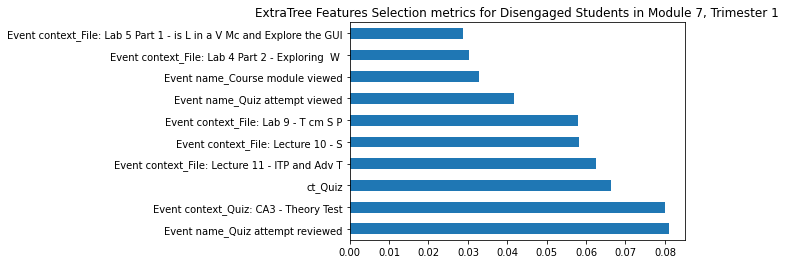

In [149]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X57s,y57s)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X57s.columns)
plt.title('ExtraTree Features Selection metrics for Disengaged Students in Module 7, Trimester 1')
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


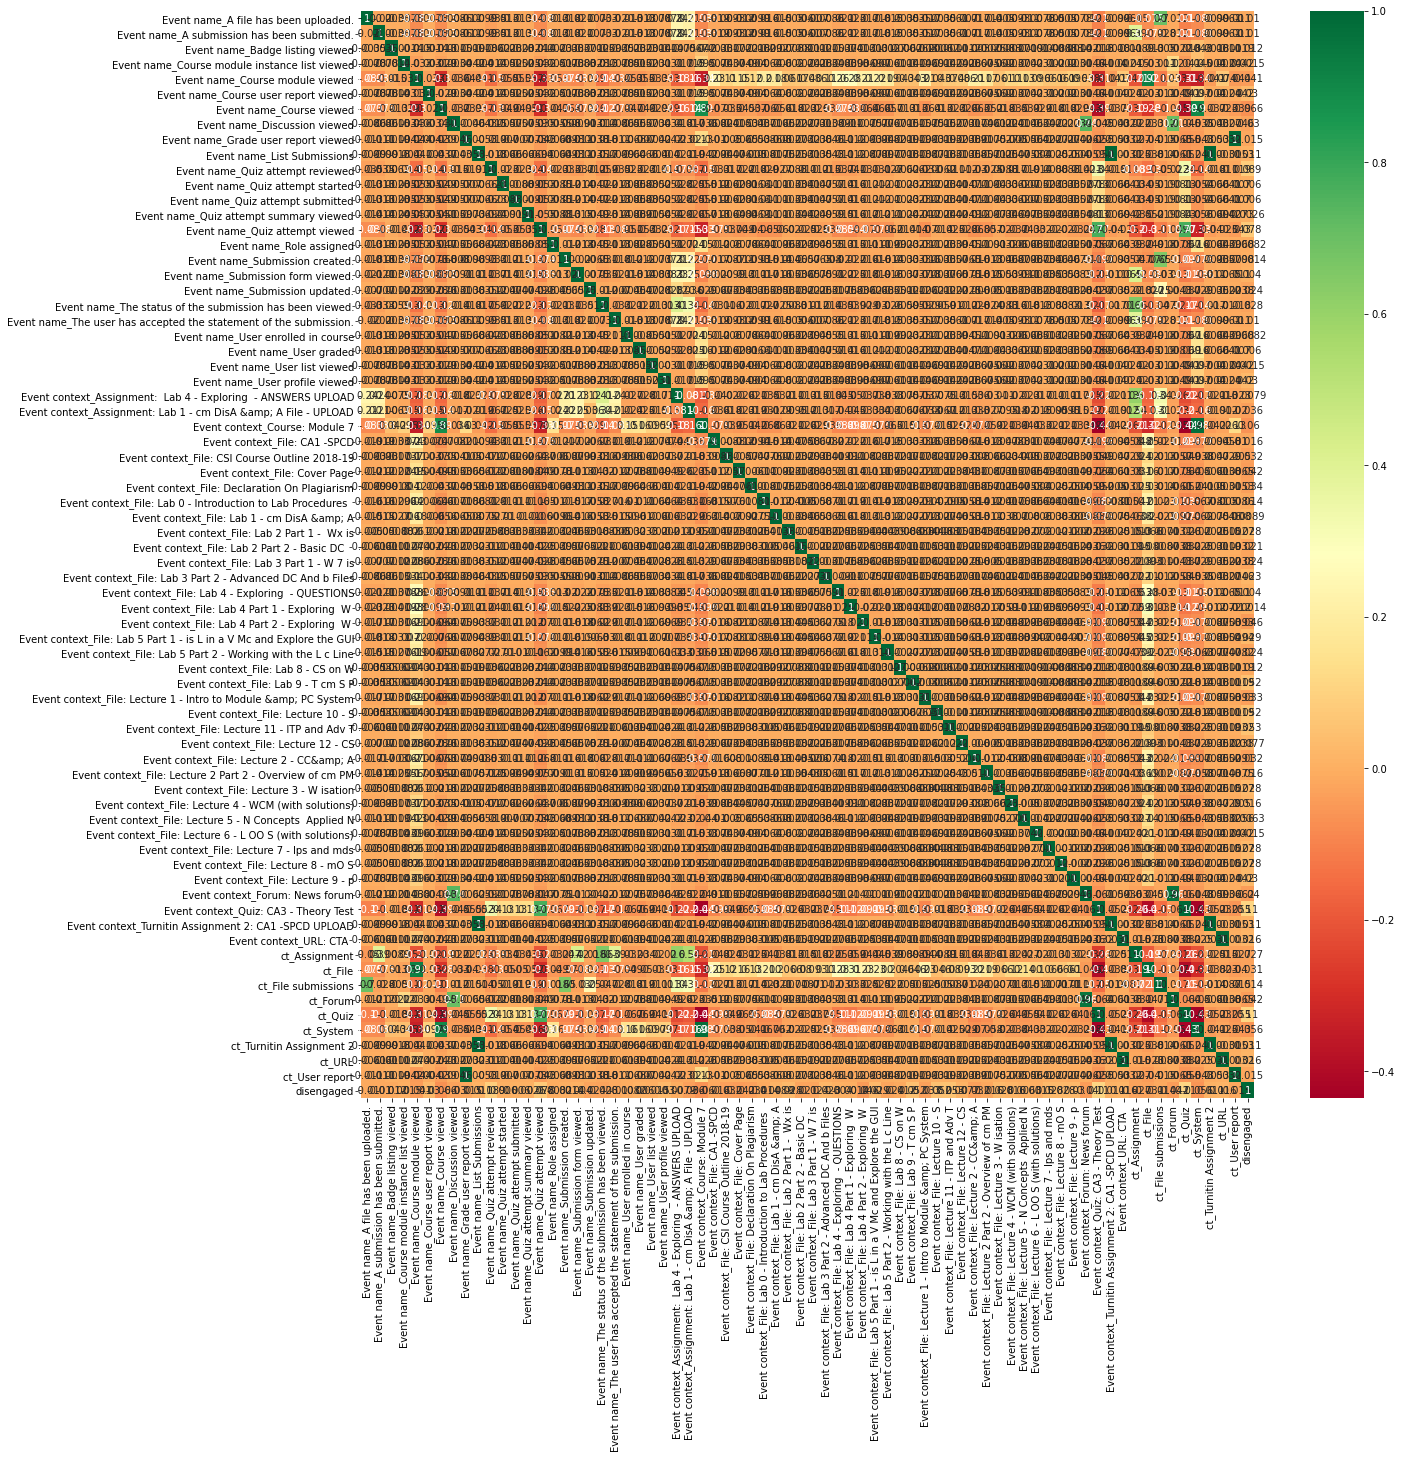

In [150]:
#get correlations of each features in dataset
corrmat = merge_subset7_tri.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(merge_subset7_tri[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [151]:
X57s.columns

Index(['Event name_A file has been uploaded.',
       'Event name_A submission has been submitted.',
       'Event name_Badge listing viewed',
       'Event name_Course module instance list viewed',
       'Event name_Course module viewed',
       'Event name_Course user report viewed', 'Event name_Course viewed',
       'Event name_Discussion viewed', 'Event name_Grade user report viewed',
       'Event name_List Submissions', 'Event name_Quiz attempt reviewed',
       'Event name_Quiz attempt started', 'Event name_Quiz attempt submitted',
       'Event name_Quiz attempt summary viewed',
       'Event name_Quiz attempt viewed', 'Event name_Role assigned',
       'Event name_Submission created.', 'Event name_Submission form viewed.',
       'Event name_Submission updated.',
       'Event name_The status of the submission has been viewed.',
       'Event name_The user has accepted the statement of the submission.',
       'Event name_User enrolled in course', 'Event name_User graded',
 

In [151]:
#
#59           Event context_Quiz: CA3 - Theory Test  12.376517
#66                                         ct_Quiz  12.376517
#10                Event name_Quiz attempt reviewed  12.065134
#14                  Event name_Quiz attempt viewed   7.457069
#6                         Event name_Course viewed   5.573043
#47  Event context_File: Lecture 11 - ITP and Adv T   4.450696
#44            Event context_File: Lab 9 - T cm S P   4.279605
#46              Event context_File: Lecture 10 - S   4.279605
#27                  Event context_Course: Module 7   4.239144
#67                                       ct_System   3.798931

In [152]:
feattime57 = X57s[['Event context_Quiz: CA3 - Theory Test','ct_Quiz','Event name_Quiz attempt reviewed','Event name_Quiz attempt viewed','Event name_Course viewed','Event context_File: Lecture 11 - ITP and Adv T','Event context_File: Lab 9 - T cm S P','Event context_File: Lecture 10 - S','Event context_Course: Module 7','ct_System']]

In [153]:
Xt7a = feattime57 # Features
yt7a = y57s # Target variable

In [154]:
# Create training and testing sets
Xt7a_train, Xt7a_test, yt7a_train, yt7a_test = train_test_split(Xt7a, yt7a, test_size=0.3)


In [155]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logregt7a = LogisticRegression()

# fit the model with data
logregt7a.fit(Xt7a_train,yt7a_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [156]:
print(logregt7a.score(Xt7a_test, yt7a_test))


0.8049792531120332


In [157]:
yt7a_pred=logregt7a.predict(Xt7a_test)

In [160]:
# Perform 10-fold CV
cvscores_7a = cross_val_score(logregt7a, Xt7a_train, yt7a_train, cv = 10)
print(np.mean(cvscores_7a))

0.8129977876106196


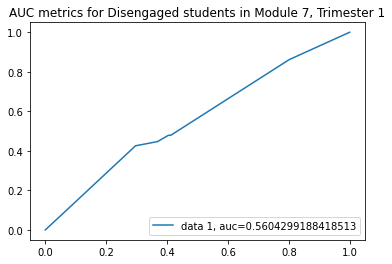

In [158]:
ylg7a_pred_proba = logregt7a.predict_proba(Xt7a_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yt7a_test,  ylg7a_pred_proba)
auc = metrics.roc_auc_score(yt7a_test, ylg7a_pred_proba)
plt.title('AUC metrics for Disengaged students in Module 7, Trimester 1')
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# AUC score for the case is 0.58. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.
#


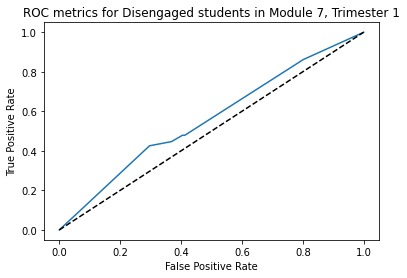

In [159]:
# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(yt7a_test, ylg7a_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.title('ROC metrics for Disengaged students in Module 7, Trimester 1')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()


In [161]:
print("Accuracy:",metrics.accuracy_score(yt7a_test, yt7a_pred))
print("Precision:",metrics.precision_score(yt7a_test, yt7a_pred))
print("Recall:",metrics.recall_score(yt7a_test, yt7a_pred))
print("F1 Score",metrics.f1_score(yt7a_test, yt7a_pred))


Accuracy: 0.8049792531120332
Precision: 0.0
Recall: 0.0
F1 Score 0.0


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [194]:
# Instantiate the classifier
rfclffs7a = RandomForestClassifier(n_estimators =1,bootstrap ='true',criterion = 'gini',max_depth = 3,max_features =3)

# Fit to the training data
rfclffs7a.fit(Xt7a_train, yt7a_train)

# Compute accuracy
print(rfclffs7a.score(Xt7a_test, yt7a_test))


0.8049792531120332


In [163]:
# Perform 10-fold CV
cvscores_10rf = cross_val_score(rfclffs7a, Xt7a_train, yt7a_train, cv = 10)
print(np.mean(cvscores_10rf))

0.812112831858407


In [195]:
from sklearn.svm import SVC

svcfs7a = SVC(kernel='linear',C=1.0)

#Train it, or "fit it", to the data:
svcfs7a.fit(Xt7a_train, yt7a_train)

# Compute accuracy
print(svcfs7a.score(Xt7a_test, yt7a_test))


0.8049792531120332


In [166]:
# Perform 10-fold CV
cvscores_10svc = cross_val_score(svcfs7a, Xt7a_train, yt7a_train, cv = 10)
print(np.mean(cvscores_10svc))

0.8129977876106196


In [196]:
# Create Decision Tree classifer object
dtclffs7a = DecisionTreeClassifier(max_depth =3,criterion ='gini',max_features =10)

# Train Decision Tree Classifer
dtclffs7a = dtclffs7a.fit(Xt7a_train,yt7a_train)

#Predict the response for test dataset
yfs7a_pred = dtclffs7a.predict(Xt7a_test)


In [197]:
# Compute accuracy
print(dtclffs7a.score(Xt7a_test, yt7a_test))

0.8049792531120332


In [172]:
print(dtclffs7a.score(Xt7a_test, yt7a_test))

0.8049792531120332


In [173]:
# Perform 10-fold CV
cvscores_10dt7a = cross_val_score(dtclffs7a, Xt7a_train, yt7a_train, cv = 10)
print(np.mean(cvscores_10dt7a))

0.812112831858407


In [174]:
# Generate the confusion matrix and classification report
print(confusion_matrix(yt7a_test, yt7a_pred))
print(classification_report(yt7a_test, yt7a_pred))


[[388   0]
 [ 94   0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       388
           1       0.00      0.00      0.00        94

    accuracy                           0.80       482
   macro avg       0.40      0.50      0.45       482
weighted avg       0.65      0.80      0.72       482



C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#``

In [198]:
# Instantiate bootstrap aggregation model
bagged_model = BaggingClassifier(n_estimators=50, random_state=123)

# Fit
bagged_model.fit(Xt7a_train, yt7a_train)

# Predict
bagged_pred = bagged_model.predict(Xt7a_test)

#print(logregfs1.score(Xfs_train, yfs_train))

# Print accuracy score
print(accuracy_score(yt7a_test, bagged_pred))


0.8049792531120332


In [199]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(bagged_model, Xt7a_train, yt7a_train, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(bagged_model, Xt7a_train, yt7a_train, cv = 10)
print(np.mean(cvscores_10))

0.812111705288176
0.812112831858407


In [200]:
# Boosting model
boosted_model = AdaBoostClassifier(n_estimators=50, random_state=123)

# Fit
boosted_model_fit = boosted_model.fit(Xt7a_train, yt7a_train)

# Predict
boosted_pred = boosted_model_fit.predict(Xt7a_test)

# Print model accuracy
print(accuracy_score(yt7a_test, boosted_pred))


0.8049792531120332


In [201]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(boosted_model, Xt7a_train, yt7a_train, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(boosted_model, Xt7a_train, yt7a_train, cv = 10)
print(np.mean(cvscores_10))

0.812111705288176
0.812112831858407


In [202]:
import xgboost as xgb

In [204]:
# Instantiate
xgb = XGBClassifier(random_state=123, learning_rate=0.1, n_estimators=10, max_depth=3)

# Fit
xgb = xgb.fit(Xt7a_train, yt7a_train)

# Predict
xgb_pred = xgb.predict(Xt7a_test)

# Print accuracy score
print('Final prediction score: [%.8f]' % accuracy_score(yt7a_test, xgb_pred))


Final prediction score: [0.80497925]


In [205]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(xgb, Xt7a_train, yt7a_train, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(xgb, Xt7a_train, yt7a_train, cv = 10)
print(np.mean(cvscores_10))

0.8130005941770647
0.8129977876106196


In [182]:
# Generate the confusion matrix and classification report
print(confusion_matrix(yt7a_test, xgb_pred))
print(classification_report(yt7a_test, xgb_pred))


[[388   0]
 [ 94   0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       388
           1       0.00      0.00      0.00        94

    accuracy                           0.80       482
   macro avg       0.40      0.50      0.45       482
weighted avg       0.65      0.80      0.72       482



C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#``

In [174]:
disengaged7.sum()

3

In [176]:
chi = stats.chisquare(disengaged7)
print(chi)

Power_divergenceResult(statistic=11.0, pvalue=0.61081762008070883)


In [178]:
# Test significance
alpha= 0.05
if chi[1] < alpha:
    print("Difference between engaged is statistically significant")
else:
    print("No significant difference between disengaged found")

No significant difference between disengaged found


In [98]:
Powerfeatselect7 = merge_subset7[['Event name_List Submissions','Event context_Turnitin Assignment 2: CA1 -SPCD UPLOAD','ct_Turnitin Assignment 2','Event context_File: Lab 6 -oS And D Qs','Event context_Course: Module 7','Event name_Grade user report viewed','ct_User report','Event name_Quiz attempt reviewed','Event context_File: Lecture 9 - p','ct_System','disengaged']]

In [99]:
Powerfeatselect7.groupby(['disengaged']).mean()

Event name_List Submissions  \
disengaged                                
0                              0.034393   
1                              0.075848   

            Event context_Turnitin Assignment 2: CA1 -SPCD UPLOAD  \
disengaged                                                          
0                                                    0.046899       
1                                                    0.091816       

            ct_Turnitin Assignment 2  Event context_File: Lab 6 -oS And D Qs  \
disengaged                                                                     
0                           0.046899                                0.000000   
1                           0.091816                                0.005988   

            Event context_Course: Module 7  \
disengaged                                   
0                                 0.341845   
1                                 0.259481   

            Event name_Grade user report viewed  ct_User report  \
disengaged                                                        
0                                      0.020844        0.020844   
1                                      0.003992        0.003992   

            Event name_Quiz attempt reviewed  \
disengaged                                     
0                                   0.036477   
1                                   0.061876   

            Event context_File: Lecture 9 - p  ct_System  
disengaged                                                
0                                    0.001563   0.317874  
1                                    0.007984   0.255489